In [1]:
#Part 1

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web 
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ticker = 'PG'
data= pd.DataFrame()
data[ticker]=web.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

In [4]:
log_returns=np.log(1+data.pct_change())

In [5]:
r=0.025

In [6]:
stdev=log_returns.std()*250**0.5

In [7]:
type(stdev)

pandas.core.series.Series

In [8]:
stdev=stdev.values # object.values - transfers the object into a numpy array
stdev

array([0.17655058])

In [25]:
T=1.0
t_intervals=250
delta_t=T/t_intervals
iterations= 10000

In [23]:
Z=np.random.standard_normal((t_intervals+1, iterations))
S= np.zeros_like(Z)
S0=data.iloc[-1]
S[0]=S0

In [28]:
for t in range(1,t_intervals+1):
	S[t]=S[t-1]*np.exp((r-0.5*stdev**2)*delta_t+stdev*delta_t**0.5*Z[t])

In [29]:
S

array([[82.17182159, 82.17182159, 82.17182159, ..., 82.17182159,
        82.17182159, 82.17182159],
       [81.49207905, 83.60911352, 83.04178615, ..., 83.06137551,
        82.84472111, 83.08451581],
       [81.70058696, 83.94496385, 82.83018657, ..., 83.33823944,
        82.62276613, 84.72666986],
       ...,
       [77.48651401, 72.55024134, 82.61481112, ..., 92.12741632,
        85.70527896, 80.23393969],
       [77.67523875, 73.29888952, 81.64973725, ..., 91.567774  ,
        84.69793145, 78.62434844],
       [78.70896151, 72.37655771, 81.22100943, ..., 91.70841248,
        85.02692203, 78.74172754]])

In [30]:
S.shape

(251, 10000)

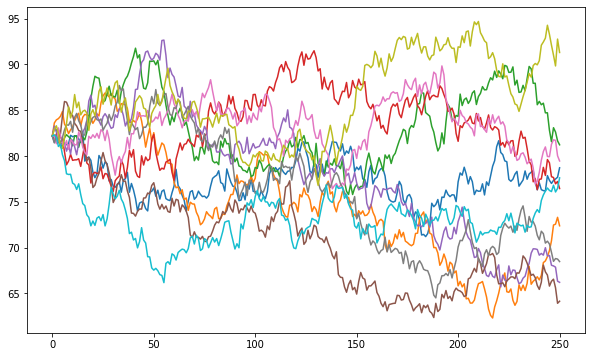

In [33]:
plt.figure(figsize=(10,6))
plt.plot(S[:,:10]);
# Specificfy want to plot S, we can add an index operator where all 250 interval must be ploted by typing a : and,only want to view the 1st 10 not the enire 10000

In [34]:
# Part 2

In [36]:
p=np.maximum(S[-1]-110,0) # create an array that contains either 0s or the number equal to the difference


In [37]:
p


array([0., 0., 0., ..., 0., 0., 0.])

In [38]:
p.shape

(10000,)

In [39]:
C=np.exp(-r*T)*np.sum(p)/iterations
C

0.45248210138288275